In [8]:
!git clone "https://github.com/polito-EAD-2026/EAD26-U05.analisi-audio-tempo-frequenza.git"
!mv ./EAD26-U05.analisi-audio-tempo-frequenza/* .

fatal: destination path 'EAD26-U05.analisi-audio-tempo-frequenza' already exists and is not an empty directory.
mv: cannot stat './EAD26-U05.analisi-audio-tempo-frequenza/*': No such file or directory


In [9]:
# Install Librosa
!pip install -q "librosa"

In [10]:
import librosa
import librosa.display
import soundfile as sf

import numpy as np
import scipy
from scipy import signal


from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 14})

import IPython
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from pprint import pprint

np.set_printoptions(suppress=True)



In [11]:
import matplotlib.pyplot as plt

"""
Example of usage:
import numpy as np
N, Fs, A, f = 10, 10, 0.5, 2
t = np.arange(N) / Fs
s = A * np.cos(2 * np.pi * f * t)
plot_vs_time(s,t, fmt='-*')
"""

def plot_vs_time(w, t, xlim=None, ylim=[-1, +1], fig=None, fmt='-'):
    """
    Plots a waveform versus time using matplotlib.
    Parameters:
        w (array-like): The waveform data to plot (y-axis values).
        t (array-like): The time values corresponding to the waveform (x-axis values).
        xlim (tuple, optional): Limits for the x-axis as (min, max). If None, uses the range of t.
        ylim (list or tuple, optional): Limits for the y-axis as [min, max]. Defaults to [-1, +1].
        fig (matplotlib.figure.Figure, optional): Existing figure to plot on. If None, creates a new figure.
        fmt (str, optional): Format string for the plot line (e.g., '-', '--', 'o'). Defaults to '-'.
    Returns:
        tuple: (fig, ax) where fig is the matplotlib Figure object and ax is the Axes object.
    Notes:
        - The function sets axis labels, grid, and tight layout for better appearance.
        - If no figure is provided, a new figure with size (12, 3) is created.
    """
    fig, ax = plt.subplots(figsize=(12,3)) if fig is None else fig
    ax.plot(t,w,fmt)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.set_xlim(xlim) if xlim is not None else plt.xlim(t[0],t[-1])
    ax.set_ylim(ylim) if ylim is not None else None
    fig.tight_layout()
    ax.grid(visible=True)

import numpy as np
import matplotlib.pyplot as plt

# plot frequency spectrum
def plot_vs_freq(X, f, Fs, type="linear", xlim=None, ylim=None, fig=None, zp=False, fmt="-"):

  fig, ax = plt.subplots(figsize=(6,3)) if fig is None else fig
  xlim = [np.min(f), np.max(f)] if xlim is None else xlim

  if type == "linear":
    ax.set_ylabel('Magnitude')
    ylim = [0, 1.2] if ylim is None else ylim
    X = X
  elif type == "log":
    ax.set_ylabel('Power (dBFS)')
    ylim = [-60, +6] if ylim is None else ylim
    X = 10*np.log10(X**2)

  ax.plot(f, X, fmt)
  ax.set_xlabel('Frequency (Hz)')

  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  plt.grid(visible=True);
  plt.tight_layout()

# plot_vs_freq(x, Fs, N)
# plot_vs_freq(x, Fs, N, xlim=[2, 5], ylim=[-10, 3])

import numpy as np

def dft(x, Fs, N=None):
  L = len(x)
  N = L if N is None else N
  X = np.fft.rfft(x, N)
  X_ = np.abs(X) / (L/2)
  freq = np.fft.rfftfreq(N, d=1./Fs)
  # X_ = X_[:N//2+1]
  # freq = freq[:N//2+1]
  # X_dBFS = 20*np.log10(X_)
  return X_, freq

def normalize(x):
  return x / np.max(np.abs(x))

def RMS(x):
  return np.sqrt(np.mean(x**2))

def dBFS(x):
  return 20*np.log10(RMS(x)+np.finfo(float).eps)

# Analisi a "breve termine"

Utilizzare l'algoritmo `[Analisi "a blocchi / finestre" in Python]` per calcolare l'RMS su blocchi sovrapposti dell'audio
* Provare differenti valori di L ed H e identificare quelli più adatti
* Calcolare i picchi dell'RMS per identificare i punti di onset
  - scipy.signal.find_peaks
* Rappresentare graficamente
  - Il quadrato dei valori del segnale (y^2) - linea blu
  - I valori dell'RMS calcolati per ogni frame - punti arancioni
  - I punti di onset identificati - stelle verdi

![img](https://raw.githubusercontent.com/polito-EAD-2026/EAD26-U05.analisi-audio-tempo-frequenza/refs/heads/main/images/onset-queen-step01.png)


In [12]:
# Helper functions

def pad_to_multiple(array, multiple):
  length = len(array)
  target = ((length + multiple - 1) // multiple) * multiple
  return np.pad(array, (0, target - length), mode='constant')

def round_to_even(x):
    return int(2 * round(x / 2))

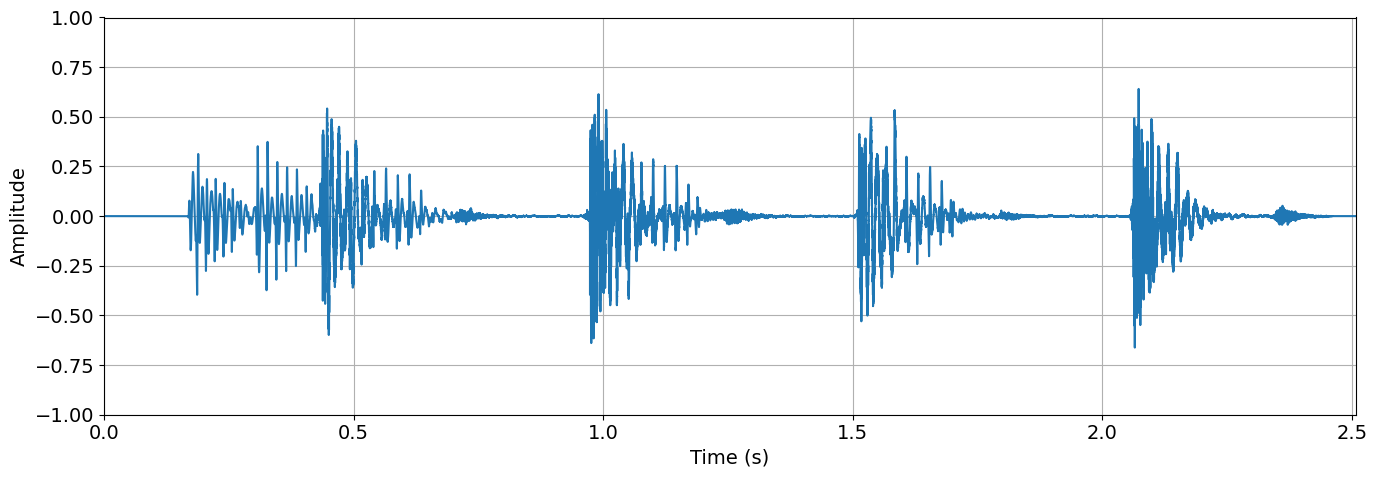

In [15]:
# TODO: implement "analisi a blocchi" as in the slide
# correct errors if presents

from scipy import signal

filename = '/content/media/queen-onset.wav'
y, Fs = librosa.load(filename, sr=None)

fig, ax = plt.subplots(figsize=(14,5))
t = np.arange(0,len(y))/Fs
plot_vs_time(y, t, fig=(fig,ax))

#################################################################
# TODO: here
# implement frame based analysis of RMS
#
# define
# L: window length
# H: hop size
# win: window shape (from scipy.signal.windows.<window_name>)
# use RMS() function instead of fn()
#
# compute
# idxs: array with the indexes of the first sample for each frame
# vals: array with the RMS values for each frame
# peaks: peaks of vals using scipy.signal.find_peaks

idxs = None
vals = None
peaks = None


#################################################################


# plotting
if idxs is not None and vals is not None:
  # for plotting move idxs from frame begin to middle
  idxs = idxs + L//2
  ax2 = ax.twinx()
  ax2.plot(idxs/Fs, vals, '-xr', linewidth=2)
  ax2.set_ylabel("RMS", color="red")
  ax2.tick_params(axis="y", labelcolor="red")
  ax2.set_title(f"L: {L/Fs:.2} ms, L: {L} samples")

if peaks is not None:
  peaks_i = idxs[peaks]
  ax2.plot(peaks_i/Fs, vals[peaks], '*g', ms=10)

